In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

In [2]:
df = pd.read_csv('Adiac/Adiac_TEST', header=None)
df = df.append(pd.read_csv('Adiac/Adiac_TRAIN', header=None), ignore_index=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
0,16,1.3749,1.2894,1.2043,1.1194,1.03470,0.95034,0.86603,0.78228,0.69923,...,1.40010,1.4843,1.5686,1.6463,1.6800,1.6926,1.6591,1.6104,1.5392,1.4519
1,36,1.3400,1.2353,1.1320,1.0305,0.93215,0.83502,0.74182,0.65009,0.56003,...,1.56980,1.6638,1.7269,1.7411,1.7578,1.7698,1.7220,1.6572,1.5481,1.4414
2,34,1.6742,1.6438,1.5707,1.4888,1.40600,1.32370,1.24120,1.15880,1.07650,...,0.98304,1.0652,1.1474,1.2298,1.3128,1.3958,1.4783,1.5605,1.6345,1.6737
3,22,1.5533,1.5450,1.5180,1.4934,1.45030,1.41060,1.35220,1.29150,1.20630,...,1.08300,1.1776,1.2639,1.3566,1.4124,1.4523,1.4824,1.4986,1.5475,1.5537
4,16,1.5191,1.4893,1.4434,1.4010,1.31820,1.23340,1.14880,1.06520,0.98017,...,1.17670,1.2654,1.3530,1.4388,1.5076,1.5582,1.5960,1.5936,1.5803,1.5539


In [3]:
df.drop(0, axis=1, inplace=True)
df.head()

,1,2,3,4,5,6,7,8,9,10,...,167,168,169,170,171,172,173,174,175,176
0,1.3749,1.2894,1.2043,1.1194,1.03470,0.95034,0.86603,0.78228,0.69923,0.61552,...,1.40010,1.4843,1.5686,1.6463,1.6800,1.6926,1.6591,1.6104,1.5392,1.4519
1,1.3400,1.2353,1.1320,1.0305,0.93215,0.83502,0.74182,0.65009,0.56003,0.47755,...,1.56980,1.6638,1.7269,1.7411,1.7578,1.7698,1.7220,1.6572,1.5481,1.4414
2,1.6742,1.6438,1.5707,1.4888,1.40600,1.32370,1.24120,1.15880,1.07650,0.99451,...,0.98304,1.0652,1.1474,1.2298,1.3128,1.3958,1.4783,1.5605,1.6345,1.6737
3,1.5533,1.5450,1.5180,1.4934,1.45030,1.41060,1.35220,1.29150,1.20630,1.11260,...,1.08300,1.1776,1.2639,1.3566,1.4124,1.4523,1.4824,1.4986,1.5475,1.5537
4,1.5191,1.4893,1.4434,1.4010,1.31820,1.23340,1.14880,1.06520,0.98017,0.89555,...,1.17670,1.2654,1.3530,1.4388,1.5076,1.5582,1.5960,1.5936,1.5803,1.5539


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Columns: 176 entries, 1 to 176
dtypes: float64(176)
memory usage: 1.0 MB


In [5]:
series = list()
for i in range(len(df)):
    series.append(df.iloc[i])
series = np.array(series)
series

array([[1.3749, 1.2894, 1.2043, ..., 1.6104, 1.5392, 1.4519],
       [1.34  , 1.2353, 1.132 , ..., 1.6572, 1.5481, 1.4414],
       [1.6742, 1.6438, 1.5707, ..., 1.5605, 1.6345, 1.6737],
       ...,
       [2.5956, 2.6251, 2.424 , ..., 2.144 , 2.1289, 2.1176],
       [1.6599, 1.6441, 1.5938, ..., 1.5799, 1.6369, 1.6602],
       [1.7266, 1.7289, 1.7117, ..., 1.5964, 1.6403, 1.6988]])

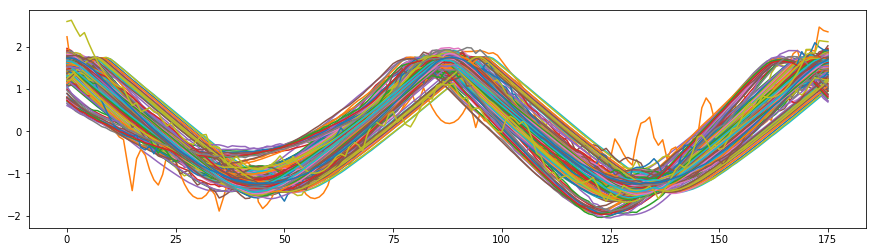

In [6]:
plt.figure(figsize=(15,4))
for s in series:
    plt.plot(range(0,len(s)), s)
plt.draw()

In [ ]:
seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train
X_train = X_train[y_train < 5 ] # Keep first 3 classes$
numpy.random.shuffle(X_train)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:100])  # Keep only 50 time series
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)  # Make time series shorter
sz = X_train.shape[1]
print (X_train.shape)
plt.show()
for elem in X_train:
    df=pd.DataFrame(elem)
    plt.plot(df)
    
plt.show()

In [ ]:
#Test